# **Análise dos dados de combustíveis de Junho a Julho de 2023 (ANP)**

## Intrução

A análise exploratória de dados desempenha um papel fundamental na extração de insights e na compreensão dos padrões subjacentes aos conjuntos de dados. Nesta análise, focamos nossa atenção nos preços dos combustíveis, visando entender as tendências, variações regionais e possíveis fatores que influenciam os preços no mercado.

Os preços dos combustíveis são um indicador econômico crucial que afeta direta e indiretamente várias esferas da sociedade. Desde impactos nos custos de transporte até reflexos nos índices de inflação, os preços dos combustíveis desempenham um papel intrincado no cenário econômico global e local.

Vamos mergulhar nos insights obtidos e nas considerações finais para extrair um panorama mais claro das nuances que envolvem os preços dos combustíveis.

## Dicionário de Variável
`dados_julho`: DataFrame contendo os dados do mês de Julho.

`dados_junho`: DataFrame contendo os dados do mês de Junho.

`dados`: DataFrame resultante da concatenação dos dados de Junho e Julho.

`dados_gasolina`: DataFrame contendo os dados apenas da Gasolina.

`dados_gasolina_aditivada`: DataFrame contendo os dados apenas da Gasolina Aditivada.

`dados_etanol`: DataFrame contendo os dados apenas do Etanol.

`mgas_c`: Preço médio da gasolina comum.

`mgas_a`: Preço médio da gasolina aditivada

`metan`: Preço médio do etanol

`media_de_combustiveis`: Série contendo a média de preço dos combustíveis por tipo.

`df_precos_medios`: DataFrame contendo os preços médios da Gasolina Aditivada por estado.

`df_precos_medios2`: DataFrame contendo os preços médios da Gasolina por estado.

`df_precos_medios3`: DataFrame contendo os preços médios do Etanol por estado.

`aditivada_estados`: Top 5 estados com maior preço médio de Gasolina Aditivada.

`gasolina_estados`: Top 5 estados com maior preço médio de Gasolina.

`etanol_estados`: Top 5 estados com maior preço médio de Etanol.

`preco_etanol_medio`: Preço médio do Etanol por estado.

`preco_gasolina_medio`: Preço médio da Gasolina por estado.

`preco_gasolina_aditivada_medio`: Preço médio da Gasolina Aditivada por estado.

`preco_etanol_medio`: Preço médio do Etanol por estado.

`dados_pernambuco`: Dados apenas do estado de Pernambuco.

`dados_saopaulo`: Dados apenas do estado de São Paulo.

`dados_acre`: Dados apenas do estado do Acre.

`concatenated_df`: DataFrame contendo os dados de Gasolina de Pernambuco.
 São Paulo e Acre.



## A análise responde às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
11. Extra - Variação dos preços dos combustíveis na cidade do Recife.
12. Extra - Comparando preços dos Estados: Pernambuco, São Paulo e Acre, dos últimos 2 meses
13. Extra - Variação dos preços dos combustíveis nas cidades: Londrina-RS, Salvador-BA e Rio de Janeiro-RJ

## Importação de Bibliotecas:

Nesta seção, as bibliotecas necessárias para a análise de dados são importadas, incluindo:

- Pandas para manipulação de dados,

- NumPy para cálculos numéricos,

- Matplotlib e Seaborn para visualização de gráficos.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

##Importação dos Dados:

Os dados dos preços da gasolina C e etanol para os meses de junho e julho de 2023 são importados diretamente do site da ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis) e são armazenados em DataFrames separados para junho e julho. Em seguida, os DataFrames são concatenados em um único DataFrame chamado "dados".

In [2]:
# Importando dados do mês de Junho
dados_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))
# Importando dados do mês de Julho
dados_julho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv", sep=(";"))

# Concatenando as tabelas
dados = pd.concat([dados_junho, dados_julho,], ignore_index=True)

- Após a importação dos dados vamos utilizar o método ``info()`` para verificar a quantidade de registros existentes e inexistentes como também os tipos de registros.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103556 entries, 0 to 103555
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     103556 non-null  object 
 1   Estado - Sigla     103556 non-null  object 
 2   Municipio          103556 non-null  object 
 3   Revenda            103556 non-null  object 
 4   CNPJ da Revenda    103556 non-null  object 
 5   Nome da Rua        103556 non-null  object 
 6   Numero Rua         103518 non-null  object 
 7   Complemento        22969 non-null   object 
 8   Bairro             103332 non-null  object 
 9   Cep                103556 non-null  object 
 10  Produto            103556 non-null  object 
 11  Data da Coleta     103556 non-null  object 
 12  Valor de Venda     103556 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  103556 non-null  object 
 15  Bandeira           103556 non-null  object 
dtypes:

- Com essas informações já percebemos que há dois atributos com valores nulos e que possivelmente não precisaremos em nossa análise. O atribudo ``Valor de Compra`` tem um total de 100% dos registros nulos e o atributo ``Complemento`` está com 77,82%.

##Limpeza de Dados:

Para início na limpeza e tratamento dos dados, vamos excluir os atributos supracitados. O _Valor de Compra_ por estar totalmente nula e o _Complemento_ pois não será necessário para nossa análise utilizar complementos de endereços como também ter quase que todos os registros nulos. Além disso, o atributo _Valor de Venda_ que está como ``object`` é convertida para tipo ``float``.

In [4]:
# Resetando o Index do DataFrame dados:
dados.reset_index(0,drop=True,inplace = True)

# Exclusão da coluna Valor de Compra, pois não contém valores
dados.drop('Valor de Compra', axis=1, inplace=True)
# Exclusão da coluna Complemento
dados.drop('Complemento', axis=1, inplace=True)
dados.drop('Cep', axis=1, inplace=True)
dados.drop('CNPJ da Revenda', axis=1, inplace=True)
dados.drop('Nome da Rua', axis=1, inplace=True)
dados.drop('Numero Rua', axis=1, inplace=True)
dados.drop('Bairro', axis=1, inplace=True)



# Muda os valores da coluna Valor de Venda pra "float"
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.').astype(float)

- Agora, usando o método ``.isna().sum()`` iremos identificar quais são os registros ausentes.

In [5]:
valores_nulos = dados.isna().sum()
valores_nulos

Regiao - Sigla       0
Estado - Sigla       0
Municipio            0
Revenda              0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64

- Exibindo as primeiras 5 linhas do DataFrame utilizando o método ``.head()``. Isso permite uma visualização rápida dos primeiros registros do conjunto de dados.

In [6]:
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA


## Separação do conjunto de dados por produto

Agora, para uma melhor análise, iremos separar o DataFrame ``dados`` em 3 novos DataFrames. Isso criará subconjuntos de dados contendo informações sobre cada produto separadamente que são: _GASOLINA, GASOLINA ADITIVADA e ETANOL_.

In [7]:
# Criação do DataFrame da Gasolina
dados_gasolina = dados[(dados['Produto'] == 'GASOLINA') ].copy()
dados_gasolina.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA
6,SE,ES,COLATINA,POSTO BARBADOS LTDA,GASOLINA,01/06/2023,5.59,R$ / litro,RAIZEN
9,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,GASOLINA,01/06/2023,5.55,R$ / litro,VIBRA ENERGIA
12,SE,ES,COLATINA,POSTO ARNALDO LTDA,GASOLINA,01/06/2023,5.59,R$ / litro,IPIRANGA


- Já após a criação do primeiro dataframe, buscamos a presença de outliers nos preços de venda utilizando-se do método ``describe()`` e de um bloxpot.

In [8]:
dados_gasolina['Valor de Venda'].describe().round(2)

count    39456.00
mean         5.51
std          0.36
min          4.43
25%          5.27
50%          5.49
75%          5.73
max          7.39
Name: Valor de Venda, dtype: float64

<Axes: >

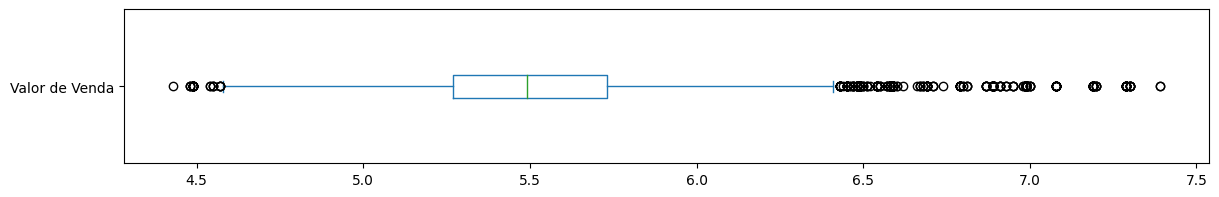

In [9]:
dados_gasolina['Valor de Venda'].plot.box(vert=False, figsize=(14,2))

- A princípio não conseguimos encontrar outliers com o primeiro método, mas quando tornamos visível com a utilização de um bloxpot vemos a presença de valores discrepantes.

In [10]:
# Criação do DataFrame da Gasolina Aditivada
dados_gasolina_aditivada = dados[(dados['Produto'] == 'GASOLINA ADITIVADA') ].copy()
dados_gasolina_aditivada.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
5,SE,ES,COLATINA,POSTO BARBADOS LTDA,GASOLINA ADITIVADA,01/06/2023,5.79,R$ / litro,RAIZEN
8,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,GASOLINA ADITIVADA,01/06/2023,5.75,R$ / litro,VIBRA ENERGIA
11,SE,ES,COLATINA,POSTO ARNALDO LTDA,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA
13,SE,ES,COLATINA,POSTO DE GASOLINA SANTO ANTONIO LTDA,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA


In [11]:
dados_gasolina_aditivada['Valor de Venda'].describe().round(2)

count    30521.00
mean         5.69
std          0.37
min          4.59
25%          5.44
50%          5.69
75%          5.89
max          8.39
Name: Valor de Venda, dtype: float64

<Axes: >

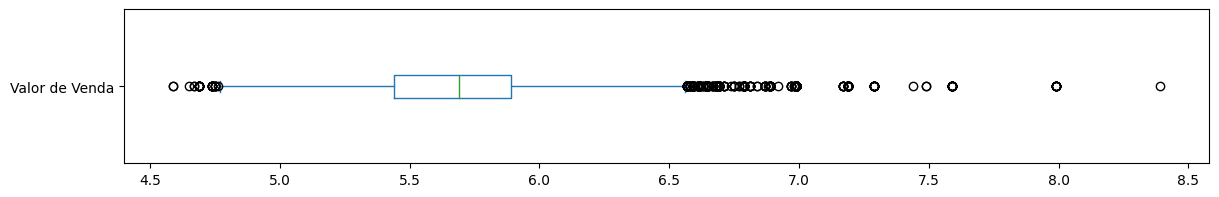

In [12]:
dados_gasolina_aditivada['Valor de Venda'].plot.box(vert=False, figsize=(14,2))


- Assim como no dataframe "Gasolina", no dataframe "Gasolina Aditivada" também tivemos a presença de valores discrepantes e nesse caso em uma maior quantidade.

In [13]:
# Criação do DataFrame do Etanol
dados_etanol = dados[(dados['Produto'] == 'ETANOL') ].copy()
dados_etanol.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
7,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,ETANOL,01/06/2023,4.79,R$ / litro,VIBRA ENERGIA
10,SE,ES,COLATINA,POSTO ARNALDO LTDA,ETANOL,01/06/2023,4.67,R$ / litro,IPIRANGA
15,CO,GO,CATALAO,POSTO CATALAO LTDA,ETANOL,01/06/2023,3.89,R$ / litro,VIBRA ENERGIA


In [14]:
dados_etanol['Valor de Venda'].describe().round(2)

count    33579.00
mean         4.04
std          0.52
min          2.79
25%          3.63
50%          3.98
75%          4.45
max          6.73
Name: Valor de Venda, dtype: float64

<Axes: >

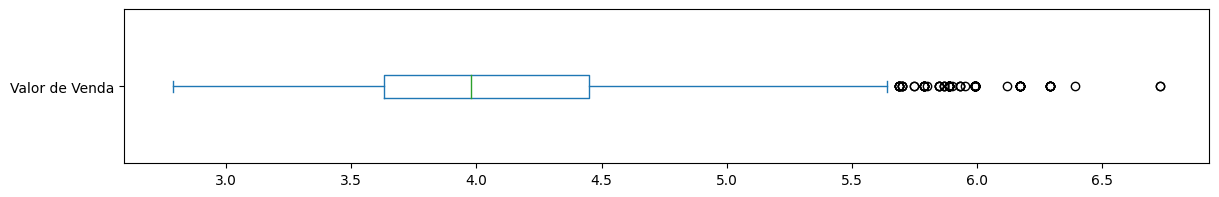

In [15]:
dados_etanol['Valor de Venda'].plot.box(vert=False, figsize=(14,2))

Com isso, conseguimos verificar rapidamente os primeiros registros dos dados, identificar a presença de valores nulos, obter descrições estatísticas sobre o valor de venda dos produtos separadamente e visualizar a distribuição desses valores por meio de boxplot. Além disso, os DataFrames separados foram criados para permitir análises mais específicas sobre cada tipo de combustível.






## Perguntas a serem respondidas com a análise

## 1. Comportamento dos preços dos combustíveis durante os meses de **Junho** e **Julho**.

Para responder esta pergunta utilizaremos um gráfico de linha para melhor representar essa variação nos preços.

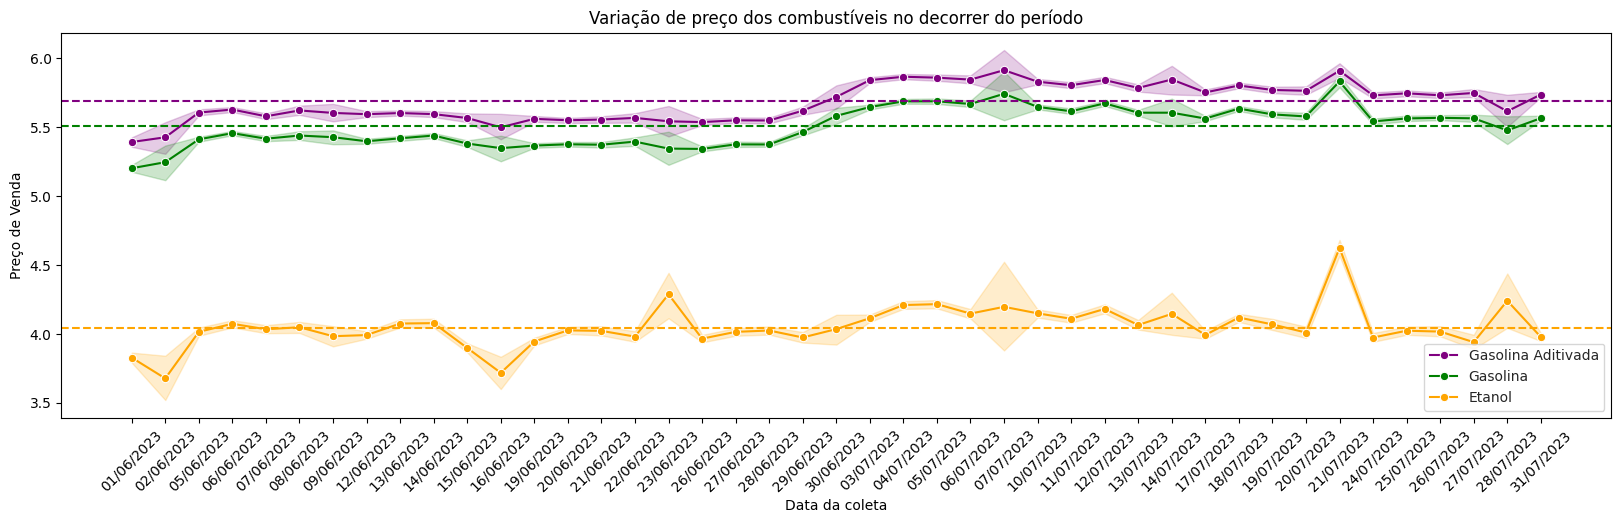

In [16]:
# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

mgas_c = dados_gasolina['Valor de Venda'].mean()            # Preço médio da gasolina comum
mgas_a = dados_gasolina_aditivada['Valor de Venda'].mean()  # Preço médio da gasolina aditivada
metan = dados_etanol['Valor de Venda'].mean()               # Preço médio do etanol

plt.figure(figsize=(20,5))
sns.lineplot(data=dados_gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina Aditivada')
sns.lineplot(data=dados_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina')
sns.lineplot(data=dados_etanol, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Etanol')
sns.set_style("whitegrid")
plt.axhline(mgas_c, color='g',linestyle='--')
plt.axhline(mgas_a, color='purple',linestyle='--')
plt.axhline(metan, color='orange',linestyle='--')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Com a utilização do gráfico temos os seguintes insights:

- O preço da gasolina comum e aditivada andam juntos;
- Em relação a média do período, até o dia 29/06 os preços da gasolina comum e aditivada estiveram sempre abaixo e após isso saltaram acima da média;
- O principal motivo para esse comportamento foi a segunda parte da reoneração de tributos federais;
- No final do segundo mês os preços já começam a se estabilizar novamente;
- Já sobre o Etanol vemos uma maior oscilação nos preços em alguns dias e em outros uma proximidade maior da média diferentemente dos combustíveis anteriores.

## 2. O preço médio da gasolina e do etanol nesses dois meses.

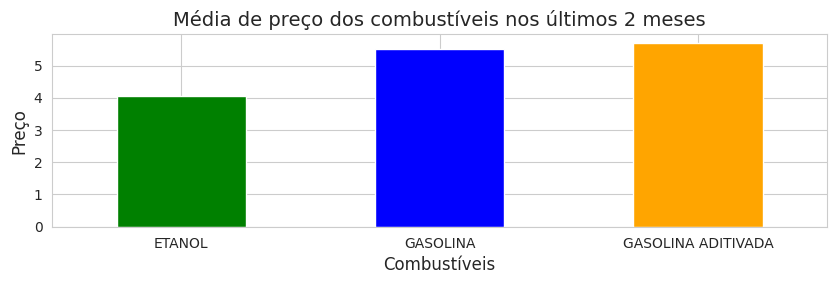

count    3.000000
mean     5.078602
std      0.901465
min      4.042867
25%      4.774730
50%      5.506592
75%      5.596469
max      5.686346
Name: Valor de Venda, dtype: float64

In [17]:
# Agrupa os combustíveis e faz uma média dos valores
media_de_combustiveis = dados.groupby('Produto')['Valor de Venda'].mean()

# Criando gráfico de barras
media_de_combustiveis.plot(kind='bar', figsize=(10,2.5), rot=0, color=['green', 'blue', 'orange'])
sns.set_style("whitegrid")
plt.title('Média de preço dos combustíveis nos últimos 2 meses', fontsize = 14)
plt.ylabel('Preço', fontsize = 12)
plt.xlabel('Combustíveis', fontsize = 12)
plt.show()
media_de_combustiveis.describe()

- O preço médio do **ETANOL** é de: **R$ 4.04**

- O preço médio do **GASOLINA** é de: **R$ 5.51**

- O preço médio do **GASOLINA ADITIVADA** é de: **R$ 5.69**
              
   

## 3. Os 5 estados com o preço médio da gasolina e do etanol mais caros.

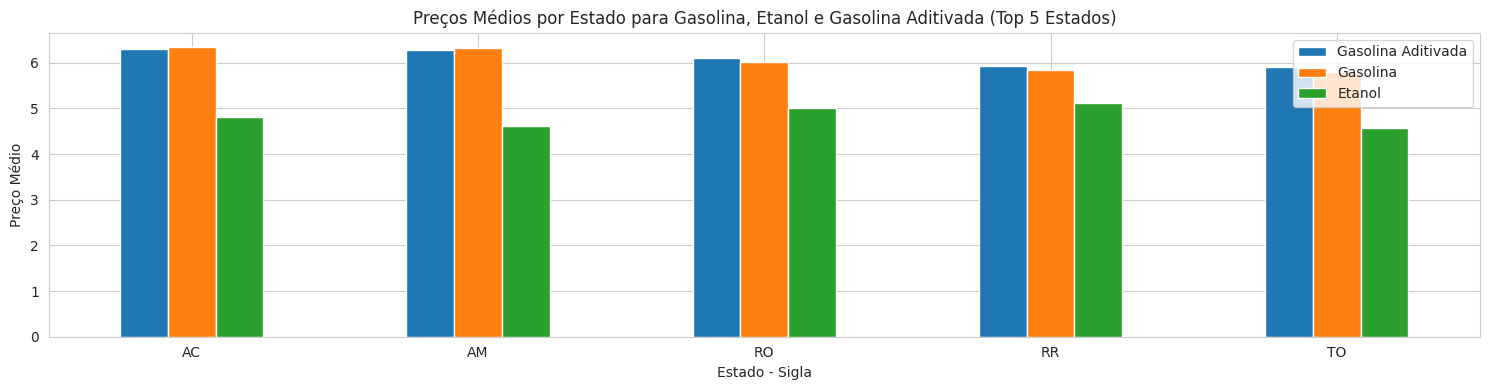

                Aditivada
Estado - Sigla           
AC               6.304203
AM               6.278139
RO               6.095025
RR               5.920444
TO               5.903172 

                Gasolina
Estado - Sigla          
AC              6.339545
AM              6.314297
RO              6.016365
RR              5.842083
TO              5.793946 

                  Etanol
Estado - Sigla          
AP              5.246667
RR              5.115517
RO              5.012737
RS              4.839457
AC              4.809221


In [18]:
# Calcular os preços médios por estado para gasolina, etanol e gasolina aditivada
media_gasolina_aditivada = dados_gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_gasolina = dados_gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_etanol = dados_etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os preços médios por estado
df_precos_medios = pd.DataFrame({
    'Aditivada': media_gasolina_aditivada})
df_precos_medios2 = pd.DataFrame({
    'Gasolina': media_gasolina})
df_precos_medios3 = pd.DataFrame({
    'Etanol': media_etanol})

aditivada_estados = df_precos_medios.sort_values(by='Aditivada', ascending=False).head()
gasolina_estados = df_precos_medios2.sort_values(by='Gasolina', ascending=False).head()
etanol_estados = df_precos_medios3.sort_values(by='Etanol', ascending=False).head()


# Juntar as médias em um único DataFrame
df_precos_medios['Gasolina'] = media_gasolina
df_precos_medios['Etanol'] = media_etanol

# Ordenar os estados pelos preços médios de gasolina aditivada
df_precos_medios = df_precos_medios.sort_values(by='Aditivada', ascending=False)

# Selecionar apenas os cinco primeiros estados
top_5_estados = df_precos_medios.head(5)

# Criar um gráfico de barras
fig, ax = plt.subplots(figsize=(15, 4))
top_5_estados.plot(kind='bar', ax=ax)
sns.set_style("whitegrid")
plt.title('Preços Médios por Estado para Gasolina, Etanol e Gasolina Aditivada (Top 5 Estados)')
plt.ylabel('Preço Médio')
plt.xlabel('Estado - Sigla')
plt.xticks(rotation=0)
plt.legend(["Gasolina Aditivada", "Gasolina", "Etanol"])
plt.tight_layout()

# Mostrar o gráfico
plt.show()

print(aditivada_estados,'\n')
print(gasolina_estados,'\n')
print(etanol_estados)

- Os estados com registros de média mais altos são **Acre**, **Amazonas**, **Rondônia**, **Roraima** e **Tocantins** para Gasolina Comum e Aditivada;
- E os estados **Amapá**, **Roraima**, **Rondônia**, **Ria Grande do Sul** e **Acre** para Etanol.

## 4. O preço médio da gasolina e do etanol por estado.

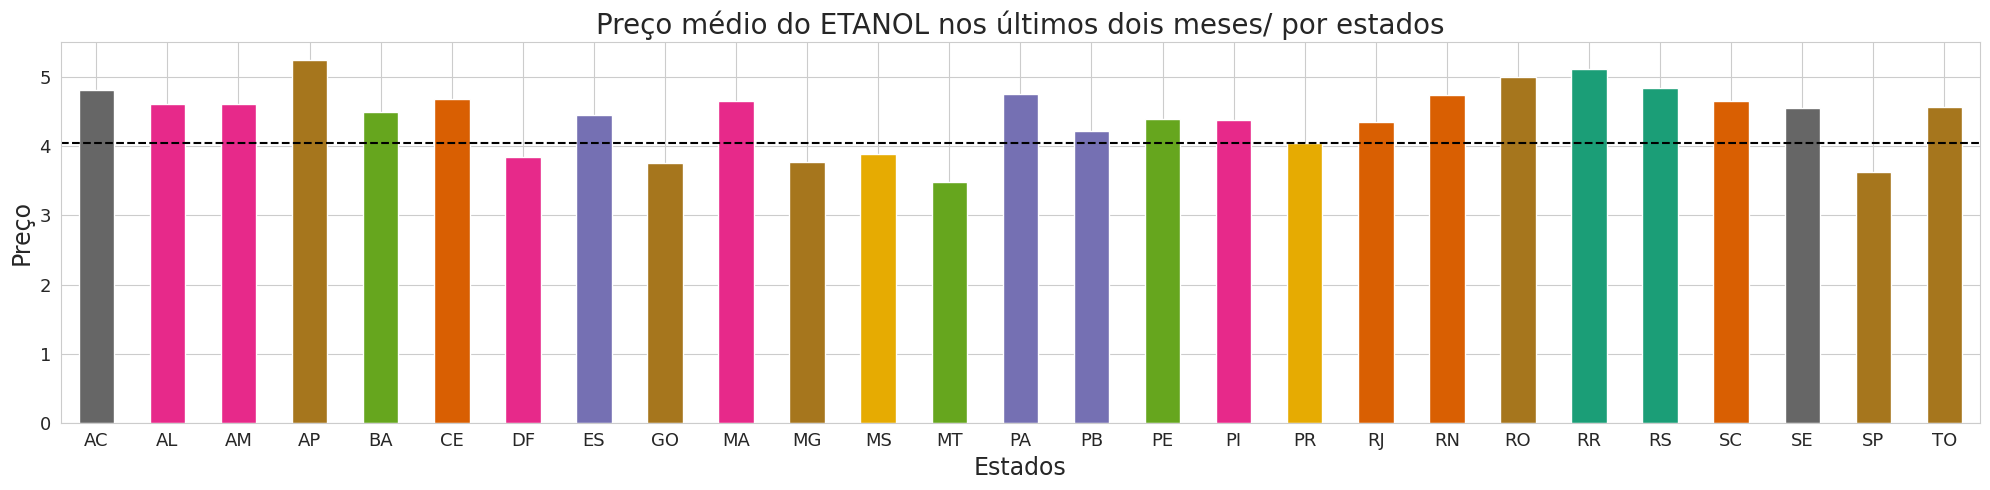

In [19]:
# Visualizando o preço médio por estado com gráfico de barras
preco_etanol_medio = dados[dados['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]

fig, ax = plt.subplots(figsize=(20, 5))
preco_etanol_medio.plot(kind='bar', rot=0, fontsize = 13, color= colors)

plt.title('Preço médio do ETANOL nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.axhline(metan, color='k',linestyle='--')
plt.tight_layout()
plt.show()
# print(preco_etanol_medio)
# print(preco_etanol_medio.describe().round(2))

- Média do preço do **Etanol** foi de: **R$ 4.43**

- Os 3 estados com o menorre preços do **Etanol** são os estados:
 - Mato Grosso(MT) com: R**$ 3.48**

 - São Paulo(SP) com: **R$ 3.63**

 - Goías(GO) com: **R$ 3.76**

- Os 3 estados com o maiores preços do **Etanol**  são os estados:
 - Amapá(AP) com: **R$ 5.25**

 - Roraima(RR) com: **R$ 5.12**

 - Rodônia(RO) com: **R$ 5.01**




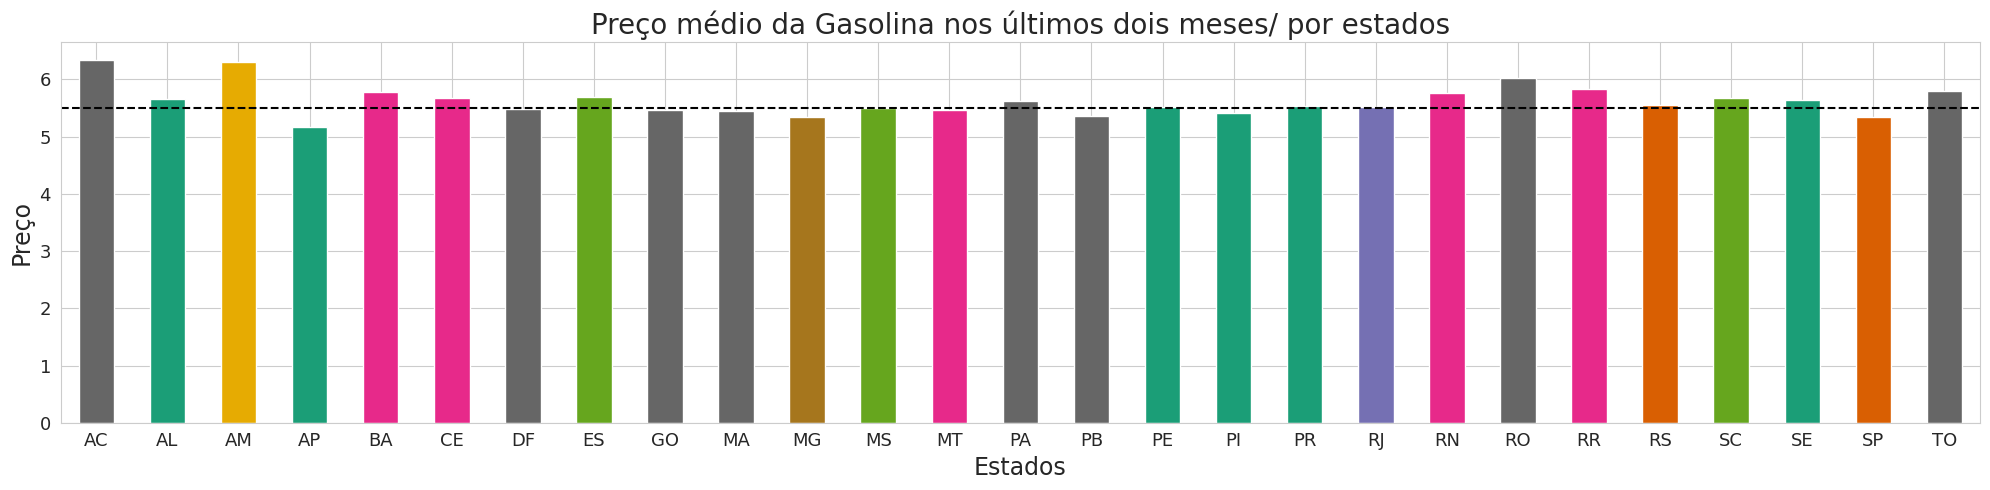

In [20]:
# Visualizando o preço médio por estado com gráfico de barras
preco_gasolina_medio = dados[dados['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]

fig, ax = plt.subplots(figsize=(20, 5))
preco_gasolina_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

sns.set_style("whitegrid")
plt.title('Preço médio da Gasolina nos últimos dois meses/ por estados', fontsize =20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.axhline(mgas_c, color='k',linestyle='--')
plt.tight_layout()
plt.show()
# print(preco_gasolina_medio)
# print(preco_gasolina_medio.describe())

- Média do preço da **Gasolina** foi de: **R$ 5.62**

- Os 3 estados com os menores preços do **Gasolina** foram os:
 - Mato Grosso(MT) com: **R$ 5.16**

 - Paraíba(PB) com: **R$ 5.36**

 - Piaui(PI) com: **R$ 5.41**


- Os 3 estados com o maiores preços do **Gasolina** foram os estados:
 - Acre(AC) com: R**$ 6.34**

 - Amazonas(AM) com: **R$ 6.31**

 - Rondonia(RO) com: **R$ 6.02**


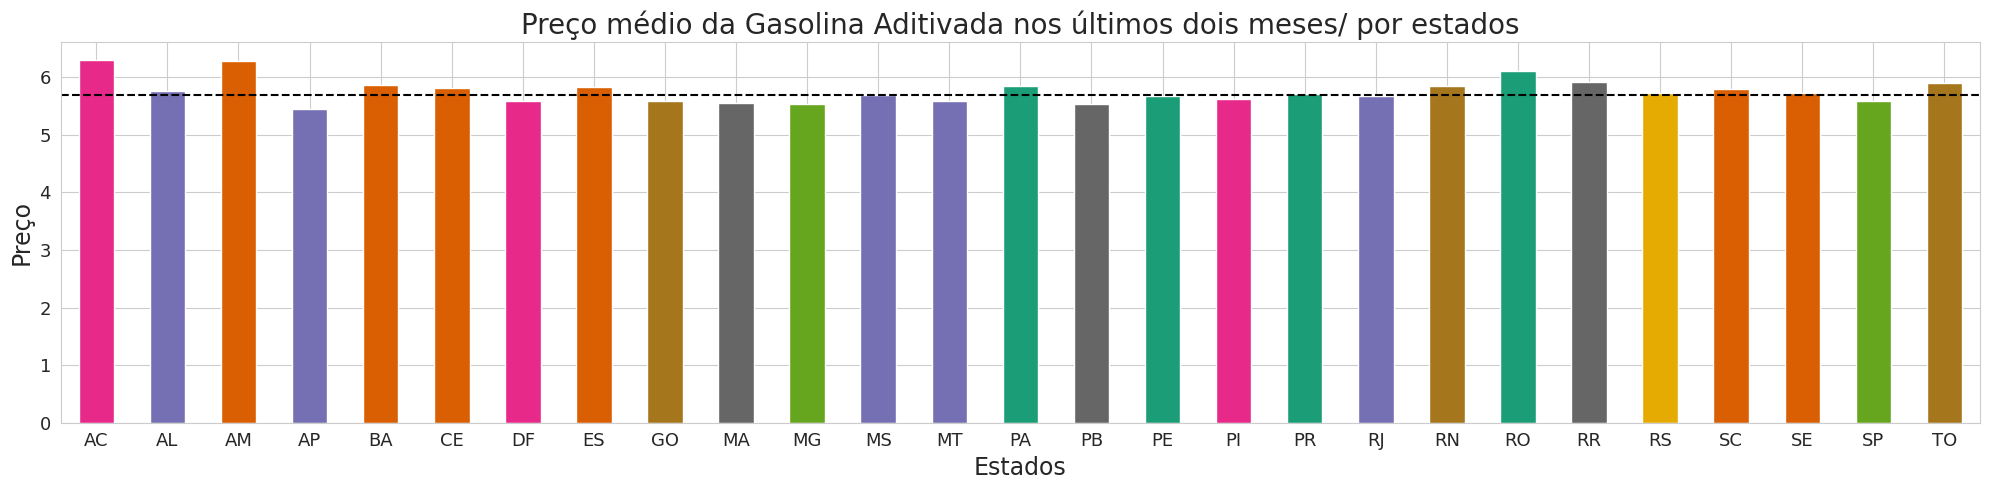

In [21]:
# Visualizando o preço médio por estado com gráfico de barras
preco_gasolina_aditivada_medio = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]

fig, ax = plt.subplots(figsize=(20, 5))
preco_gasolina_aditivada_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

sns.set_style("whitegrid")
plt.title('Preço médio da Gasolina Aditivada nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.axhline(mgas_a, color='k',linestyle='--')
plt.tight_layout()
plt.show()

# print(preco_gasolina_aditivada_medio)
# print(preco_gasolina_aditivada_medio.describe())

- Média da **Gasolina Aditivada** combustivel foi de: **R$ 5.75**

- Os 3 estados com os menores preços do **Gasolina Aditivada** foram o:
 - Mato Grosso(MT) com: **R$ 5.44**

 - Minas Gerais(MG) com: **R$ 5.53**

 - Paraiba(PB) com: **R$ 5.54**


- Os 3 estados com o maiores preços do **Gasolina Aditivada** foram os estados:
 - Acre(AC) com: R$ **6.30**

 - Amazonas(AM) com: R$ **6.28**

 - Rondonia(RO) com: R$ **6.10**


### 5. O município que possui o menor preço para a **gasolina** e para o **etanol**.

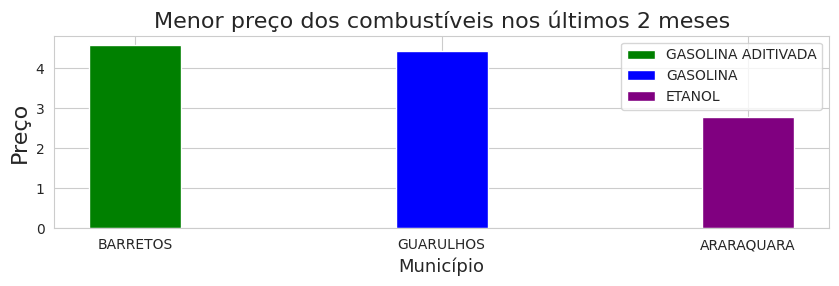

In [22]:
# gráficos e legendas
fig, ax = plt.subplots(figsize=(10,2.5));
sns.set_style("whitegrid")
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Menor preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_menor = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio = gasolina_aditivada_menor.idxmin() # Buscando os valores
valor_menor = gasolina_aditivada_menor.min()
plt.bar(menor_municipio, valor_menor, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_menor = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio2 = gasolina_menor.idxmin() # Buscando os valores
valor_menor2 = gasolina_menor.min()
plt.bar(menor_municipio2, valor_menor2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_menor = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio3 = etanol_menor.idxmin() # Buscando os valores
valor_menor3 = etanol_menor.min()
plt.bar(menor_municipio3, valor_menor3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o Gráfico
plt.legend()
plt.show()
# print(valor_menor)
# print(valor_menor2)
# print(valor_menor3)



- O menor preço dos combustíveis nos meses de Junho e Julho foi o município de:
 - **ARARAQUARA** com o **Etanol** de: R$ **2.79**

 - **GUARULHOS** com a **Gasolina** de: **R$ 4.43**

 - **BARRETOS** com **Gasolina Aditivada** de: **R$4.59**

### 6. O município que possui o maior preço para a gasolina e para o etanol.

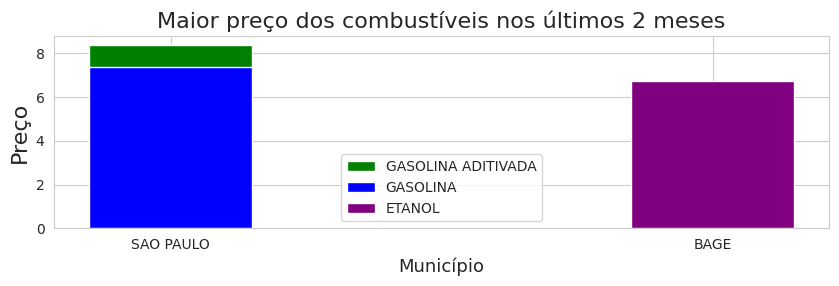

Etanol: 4.59
Gasolina 7.39
Gasolina Aditivada 6.73


In [23]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(10,2.5));
sns.set_style("whitegrid")
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Maior preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_maior = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio = gasolina_aditivada_maior.idxmax() # Buscando os valores
valor_maior = gasolina_aditivada_maior.max()
plt.bar(maior_municipio, valor_maior, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_maior = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio2 = gasolina_maior.idxmax() # Buscando os valores
valor_maior2 = gasolina_maior.max()
plt.bar(maior_municipio2, valor_maior2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_maior = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio3 = etanol_maior.idxmax() # Buscando os valores
valor_maior3 = etanol_maior.max()
plt.bar(maior_municipio3, valor_maior3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o gráfico
plt.legend()
plt.show()

print('Etanol:',valor_menor)
print('Gasolina',valor_maior2)
print('Gasolina Aditivada',valor_maior3)

- O maior preço dos combustíveis nos meses de Junho e Julho foi o município de:
 - **SÃO PAULO** com a **Gasolina** de: **R$ 6.73**

 - e a **Gasolina Aditivada** com: **R$ 7.39**


 - Em seguida os municípios de:
  - **BAGE** com o **Etanol** de: **R$ 4.43**

### 7. A região que possui o maior valor médio da gasolina.

Gasolina

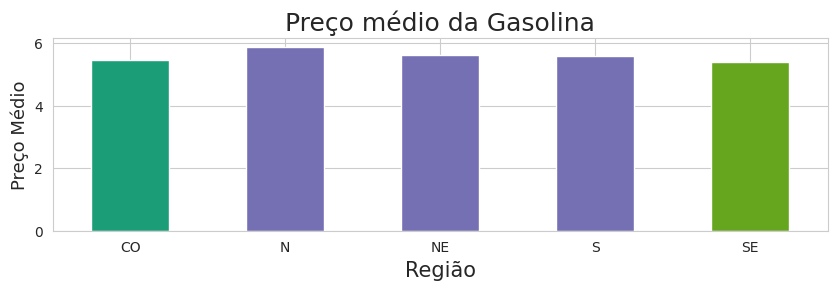

Regiao - Sigla
CO    5.47
N     5.87
NE    5.62
S     5.58
SE    5.39
Name: Valor de Venda, dtype: float64


In [24]:
# Atribuindo os dados da Gasolina
media_por_regiao = dados[dados['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(10, 2.5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

sns.set_style("whitegrid")
plt.title('Preço médio da Gasolina', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()
# print(media_por_regiao.describe().round(2),'\n')
print(media_por_regiao)

- Com base nos preços médios por região, vemos que na região **Norte(N)** do país têm os combustíveis mais caros do Brasil com o valor de: **R$ 5.87**.

- Com a média de: **R$ 5.59**

- Com base nos preços médios por região, vemos que na região **Sudeste(SE)** do país têm os combustíveis mais acessível, como é mostrado acima com o preço de: **R$ 5.39**.





Gasolina Aditivada

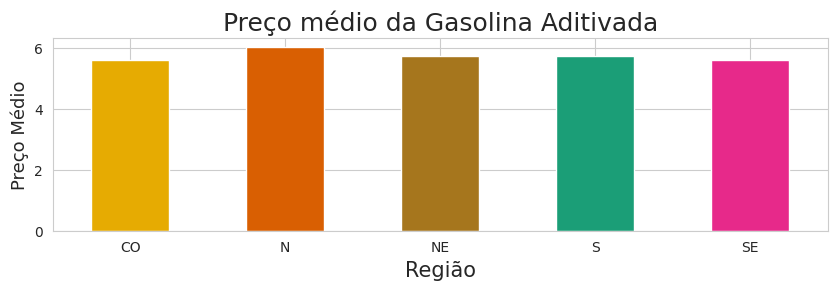

Regiao - Sigla
CO    5.61
N     6.02
NE    5.75
S     5.73
SE    5.61
Name: Valor de Venda, dtype: float64


In [25]:
# Atribuindo os dados da Gasolina Aditivada
media_por_regiao = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(10, 2.5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

sns.set_style("whitegrid")
plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()
# print(media_por_regiao.describe().round(2),'\n')
print(media_por_regiao)

- Com base nos preços médios por região, vemos que na região **Norte(N)** do país têm os combustíveis mais caros, como é mostrado acima com o valor de: **R$ 6.02**.

- Com a média de: **R$ 5.74**

- Com base nos preços médios por região, vemos que na região **Sudeste(SE)** do país têm os combustíveis mais acessível, como é mostrado acima com o preço de: **R$ 5.61**.



### 8. A região que possui o menor valor médio do etanol.

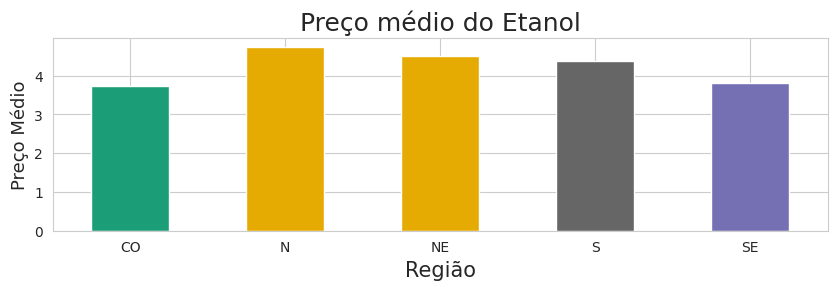

Regiao - Sigla
CO    3.74
N     4.73
NE    4.52
S     4.37
SE    3.80
Name: Valor de Venda, dtype: float64


In [26]:
# Atribuindo os dados do Etanol
media_por_regiao = dados[dados['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(10, 2.5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

sns.set_style("whitegrid")
plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()
# print(media_por_regiao.describe().round(2),'\n')
print(media_por_regiao)



- Com base nos preços médios por região, vemos que na região **Centro Oeste(CO)** do país têm o **Etanol** mais acessível, como é mostrado acima com o valor de: **R$ 3.74**

- Com a média de: **R$ 4.23**

- Com base nos preços médios por região, vemos que na região **Sul(S)** do país têm os combustíveis mais caros, como é mostrado acima com o valor de: **R$ 4.37**

### 9. Se há correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido.

Para conseguirmos responder a esta pergunta precisaremos criar uma nova coluna numerica para as regiões pois não é possível calcular correlação entre tipos ``float`` e ``str``.

In [27]:
# Função que percorre o atributo Região - Sigla e enumera de forma única
def mapear_regioes_para_numeros(dataframe):
    regiao_map = {regiao: i for i, regiao in enumerate(dataframe['Regiao - Sigla'].unique())}

    def mapear_regiao(regiao):
        return regiao_map[regiao]

    dataframe['Regiao_Num'] = dataframe['Regiao - Sigla'].apply(mapear_regiao)

# Aplicando a função para mapear regiões para valores numéricos nos DataFrames
mapear_regioes_para_numeros(dados_gasolina)
mapear_regioes_para_numeros(dados_gasolina_aditivada)
mapear_regioes_para_numeros(dados_etanol)



Após criado a nova coluna fazemos a correlação do atributo ``Valor de Venda`` com o atributo que foi criado ``Regiao_Num`` que tem um número único para cada região.

In [28]:
print('Correlação Gasolina Comum e Região: ρ = ', dados_gasolina['Valor de Venda'].corr(dados_gasolina['Regiao_Num']).round(3))
print('Correlação Gasolina Aditivada e Região: ρ = ', dados_gasolina_aditivada['Valor de Venda'].corr(dados_gasolina_aditivada['Regiao_Num']).round(3))
print('Correlação Etanol e Região: ρ = ', dados_etanol['Valor de Venda'].corr(dados_etanol['Regiao_Num']).round(3))

Correlação Gasolina Comum e Região: ρ =  0.133
Correlação Gasolina Aditivada e Região: ρ =  0.106
Correlação Etanol e Região: ρ =  0.084


De acordo com o site [medium](https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a) uma correlação entre 0 a 0,3 (positivo ou negativo) indica que não há correlação entre os atribudos analisados.

Com isso, temos que os combustíveis analisados não tem correlação com as regiões onde são vendidos.

### 10.  Se há correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele.

Para responder esta pergunda precisamos de um atribudo numérico que corresponda ao atributo Bandeira. Diferente da forma que fizemos na questão anterior, utilizaremos uma função ``lambda`` ao criar um novo atribudo e aplicar valores únicos a cada bandeira.

Para isso, buscamos ver quantas bandeiras vendem cada combustível e chegamos a conclusão de que a gasolina é vendida por mais bandeiras.

In [29]:
# Verificando a quantidade de bandeiras
a = dados_gasolina['Bandeira'].unique()
b = dados_gasolina_aditivada['Bandeira'].unique()
c = dados_etanol['Bandeira'].unique()
print('Gasolina: ', len(a), 'Bandeiras\nGasolina Aditivada: ', len(b), 'Bandeiras\nEtanol: ', len(c), 'Bandeiras')

Gasolina:  46 Bandeiras
Gasolina Aditivada:  42 Bandeiras
Etanol:  41 Bandeiras


Com isso, podemos dizer que todas as bandeiras que vendem gasolina comum também vendem gasolina aditivada e etanol. Mas o contrário não se aplica.

Então utilizamos a lista de bandeiras para criar um dicionário onde cada bandeira é enumerada com um valor único para ela.

In [30]:
# Cria um dicionário enumerando cada valor do array a
bandeiras = {valor: indice + 1 for indice, valor in enumerate(a)}

# Aplica os valores do dicionário criando uma nova coluna em cada dataframe verificando a bandeira em cada registro
dados_gasolina['N Bandeira'] = dados_gasolina['Bandeira'].apply(lambda x: bandeiras.get(x, ''))
dados_gasolina_aditivada['N Bandeira'] = dados_gasolina_aditivada['Bandeira'].apply(lambda x: bandeiras.get(x, ''))
dados_etanol['N Bandeira'] = dados_etanol['Bandeira'].apply(lambda x: bandeiras.get(x, ''))

In [31]:
print('A Correlação entre a Gasolina Comum e Bandeira que vende é: ρ = ', dados_gasolina['Valor de Venda'].corr(dados_gasolina['N Bandeira']).round(3))
print('A Correlação entre a Gasolina Aditivada e Bandeira que vende é: ρ = ', dados_gasolina_aditivada['Valor de Venda'].corr(dados_gasolina_aditivada['N Bandeira']).round(3))
print('A Correlação entre o Etanol e Bandeira que vende é: ρ = ', dados_etanol['Valor de Venda'].corr(dados_etanol['N Bandeira']).round(3))

A Correlação entre a Gasolina Comum e Bandeira que vende é: ρ =  0.121
A Correlação entre a Gasolina Aditivada e Bandeira que vende é: ρ =  0.084
A Correlação entre o Etanol e Bandeira que vende é: ρ =  0.08


Com isso, também comcluímos que não há relação entre os valores de venda dos combustíveis analisados com a bandeira que os vendem.

##Análises Extras:

- Essas análises incluem comparações entre estados específicos (Pernambuco, São Paulo e Acre) e preços menores de gasolina por comércio nos três estados.

### 11. Variação de preço dos combustíveis na cidade do Recife.

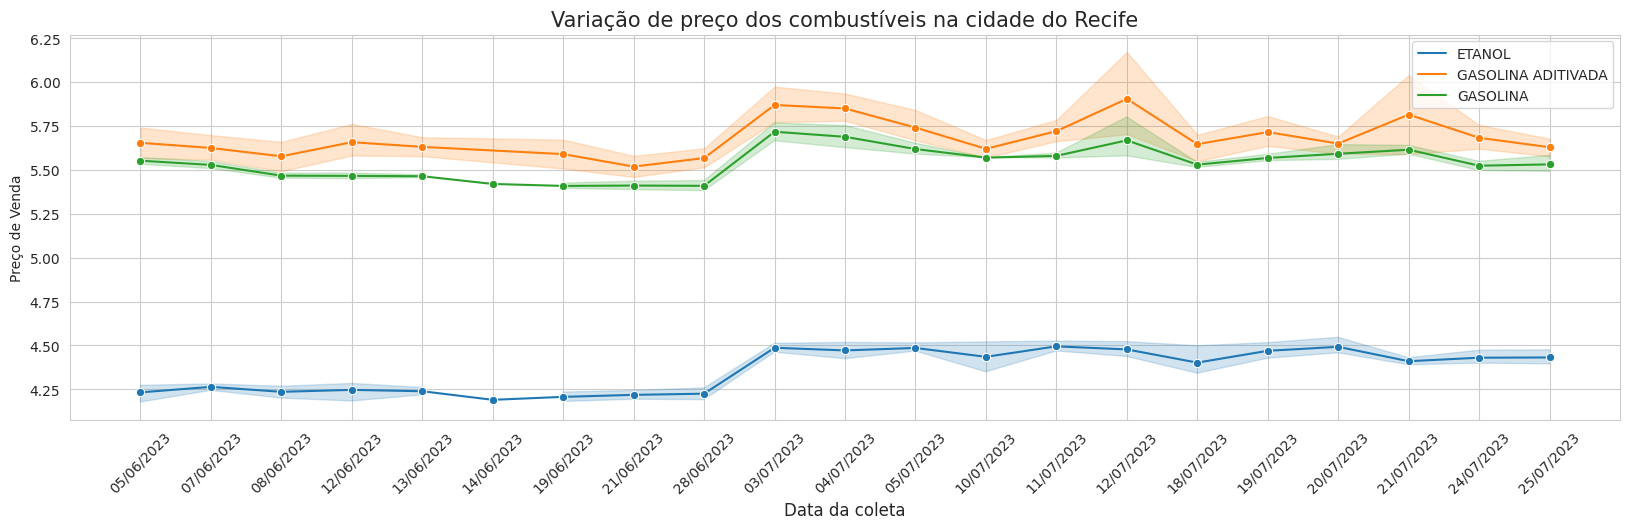

count    604.000000
mean       5.139371
std        0.614293
min        3.980000
25%        4.457500
50%        5.470000
75%        5.590000
max        6.490000
Name: Valor de Venda, dtype: float64

In [32]:
df_aux = ['Data da Coleta', 'Valor de Venda', 'Municipio', 'Produto'] # Cria um DataFrame auxiliar
df_municipios = dados.loc[:, df_aux] # transfere os valores definitivamente para o DataFrame novo

municipio_selecionado = ['RECIFE'] # Seleciona apenas uma cidade
dados_recife = df_municipios[df_municipios['Municipio'].isin(municipio_selecionado)]

dados_recife_gasolina = dados_recife[dados_recife['Produto'] == 'GASOLINA']


plt.figure(figsize=(20,5))
sns.lineplot(data=dados_recife, x='Data da Coleta', y='Valor de Venda', hue = 'Produto', marker='o', color='purple')
plt.xlabel('Data da coleta', fontsize = 12)
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis na cidade do Recife',fontsize = 15)
plt.xticks(rotation=45)
plt.legend()
plt.show()
dados_recife['Valor de Venda'].describe()



-

### 12. Comparação dos preços dos Estados: Pernambuco, São Paulo e Acre, dos últimos 2 meses

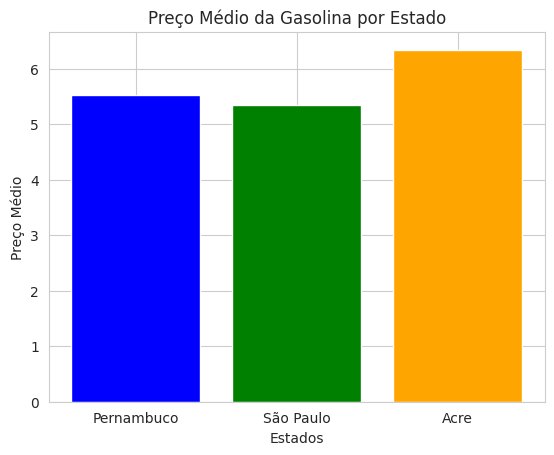

Pernanbuco: 5.52
São Paulo: 5.35
Acre: 6.34


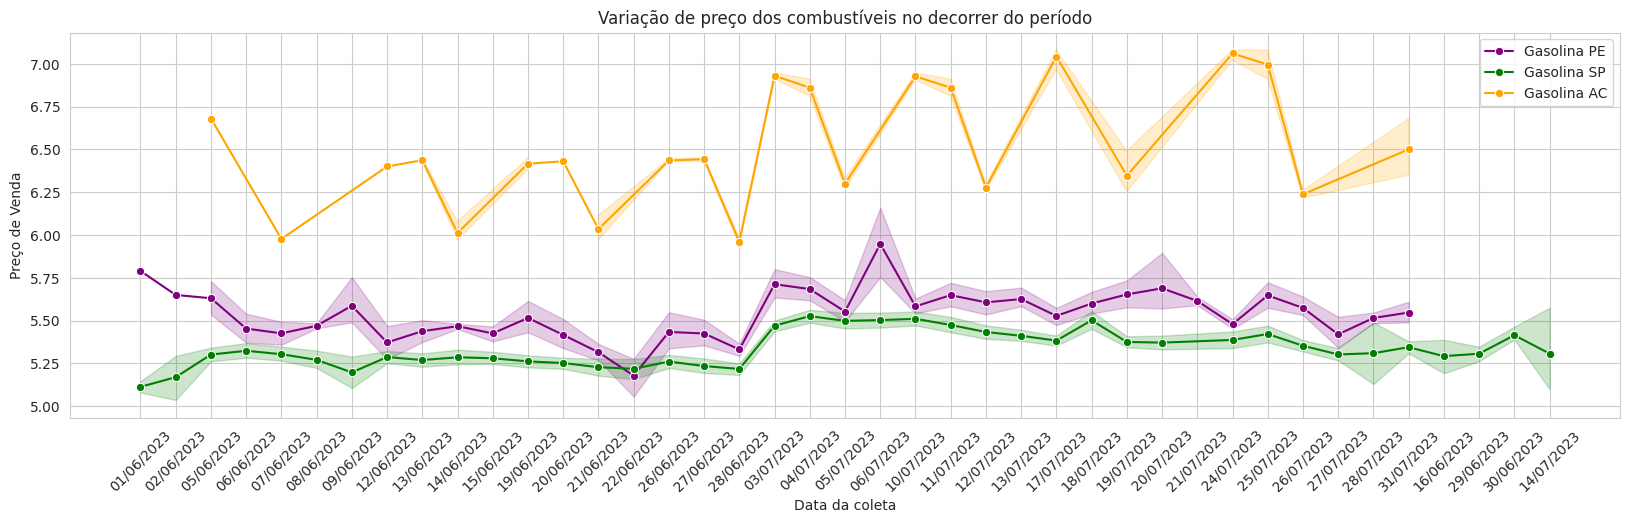

In [33]:
# Filtrando os dados apenas de 3 estados
dados_pernambuco = dados[dados['Estado - Sigla'] == 'PE']
dados_pernambuco.reset_index(0,drop=True,inplace = True)
dados_pernambuco_gasolina = dados_pernambuco[(dados_pernambuco['Produto'] == 'GASOLINA') ]

dados_saopaulo = dados[dados['Estado - Sigla'] == 'SP']
dados_saopaulo.reset_index(0,drop=True,inplace = True)
dados_saopaulo_gasolina = dados_saopaulo[(dados_saopaulo['Produto'] == 'GASOLINA') ]

dados_acre = dados[dados['Estado - Sigla'] == 'AC']
dados_acre.reset_index(0,drop=True,inplace = True)
dados_acre_gasolina = dados_acre[(dados_acre['Produto'] == 'GASOLINA') ]

concatenated_df = pd.concat([dados_pernambuco_gasolina, dados_saopaulo_gasolina, dados_acre_gasolina], ignore_index=True)

valor_coluna = 'Valor de Venda'

# Calculando os preços médios
media_pernambuco = dados_pernambuco_gasolina[valor_coluna].mean()
media_saopaulo = dados_saopaulo_gasolina[valor_coluna].mean()
media_acre = dados_acre_gasolina[valor_coluna].mean()

# Criando um gráfico de barras com cores
estados = ['Pernambuco', 'São Paulo', 'Acre']
medias = [media_pernambuco, media_saopaulo, media_acre]
cores = ['blue', 'green', 'orange']  # Cores para cada estado

plt.bar(estados, medias, color=cores)
sns.set_style("whitegrid")
plt.xlabel('Estados')
plt.ylabel('Preço Médio')
plt.title('Preço Médio da Gasolina por Estado')

# Mostrar o gráfico
plt.show()
print('Pernanbuco:',media_pernambuco.round(2))
print('São Paulo:',media_saopaulo.round(2))
print('Acre:',media_acre.round(2))

# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

plt.figure(figsize=(20,5))
sns.lineplot(data=dados_pernambuco_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina PE')
sns.lineplot(data=dados_saopaulo_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina SP')
sns.lineplot(data=dados_acre_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina AC')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# print('Pernanbuco:',media_pernambuco.round(2))
# print('São Paulo:',media_saopaulo.round(2))
# print('Acre:',media_acre.round(2))

- Os preços médios da gasolina variam consideravelmente entre os estados.
- Enquanto São Paulo apresenta um preço médio mais baixo (5.35).
- O Acre possui o preço médio mais alto (6.34).
- Isso indica que fatores como logística, impostos e demanda local podem estar influenciando diretamente os preços da gasolina em cada região.

### 13. Variação de preço dos combustíveis nas cidades: Londrina-PR, Salvador-BA e Rio de Janeiro-RJ

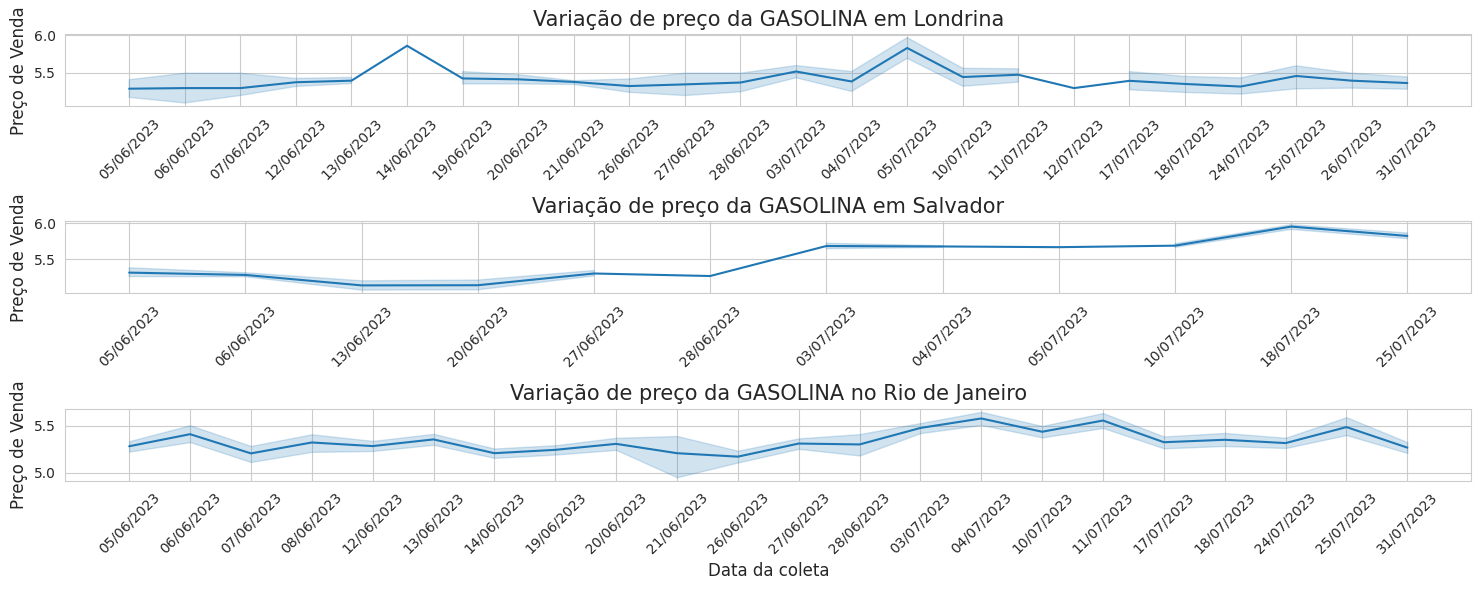

In [34]:

#  Filtrando os dados apenas de 3 estados
dados_londrina = dados[dados['Municipio'] == 'LONDRINA']
dados_londrina.reset_index(0, drop=True, inplace=True)
gasolina_londrina = dados_londrina[dados_londrina['Produto'] == 'GASOLINA']


# Filtrando os dados apenas de 3 estados
dados_salvador = dados[dados['Municipio'] == 'SALVADOR']
dados_salvador.reset_index(0, drop=True, inplace=True)
gasolina_salvador = dados_salvador[dados_salvador['Produto'] == 'GASOLINA']

# Filtrando os dados apenas de 3 estados
dados_rio = dados[dados['Municipio'] == 'RIO DE JANEIRO']
dados_rio.reset_index(0, drop=True, inplace=True)
gasolina_rio = dados_rio[dados_rio['Produto'] == 'GASOLINA']

# Criando os gráficos de linhas individuais
plt.figure(figsize=(15, 6))

plt.subplot(3, 1, 1)
sns.lineplot(data=gasolina_londrina, x='Data da Coleta', y='Valor de Venda')
plt.xlabel('')
plt.ylabel('Preço de Venda', fontsize=12)
plt.title('Variação de preço da GASOLINA em Londrina', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.lineplot(data=gasolina_salvador, x='Data da Coleta', y='Valor de Venda')
plt.xlabel('')
plt.ylabel('Preço de Venda', fontsize=12)
plt.title('Variação de preço da GASOLINA em Salvador', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.lineplot(data=gasolina_rio, x='Data da Coleta', y='Valor de Venda')
plt.xlabel('Data da coleta', fontsize=12)
plt.ylabel('Preço de Venda', fontsize=12)
plt.title('Variação de preço da GASOLINA no Rio de Janeiro', fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# print(f"\nLONDRINA: \n{dados[dados['Municipio'] == 'LONDRINA'].describe().round(2)}")
# print(f"\nSALVADOR: \n{dados[dados['Municipio'] == 'SALVADOR'].describe().round(2)}")
# print(f"\nRIO DE JANEIRO: \n{dados[dados['Municipio'] == 'RIO DE JANEIRO'].describe().round(2)}")



- A Média dos preços nas entre as cidades foram de: **R$ 5.04**

- A cidade que aprensentou o maior valor na média entre as cidades foi o **Rio de Janeiro(RJ)**, no dia **04/07/2023** com: **R$ 6.49**

- A cidade que aprensentou o menor valor na média entre as cidades foi **Londrina(RS)**, no dia **05/06/2023** com: **R$ 3.49**

- A cidade de Salvador não apresentou um bom número de dados coletador em comparação os outras cidades que foi possiver tirar, bons insights.

## Considerações finais

Durante esta análise exploratória dos dados de preços de combustíveis, diversas insights foram obtidos a partir da exploração de diferentes aspectos dos dados. Abaixo, apresentamos um resumo das principais conclusões:


**Relação com ações políticas:**
- Foram observados variações nos preços principalmente da gasolina comum e aditivada decorrentes de ações políticas para aumento de arrecadação através de aplicação de impostos.

**Diferenças Regionais:**
- Identificamos variações significativas nos preços dos combustíveis entre algumas regiões geográficas. Essas diferenças podem ser influenciadas por fatores como logística de transporte, custos regionais ou até impostos estaduais.

**Análise de Outliers:**

- Foram identificados alguns outliers nos dados, representando preços extremamente altos ou baixos. Estes podem ser resultado de eventos isolados ou erros nos dados.

**Correlações com Indicadores Econômicos:**

- Não encontramos correlações significativas entre os preços dos combustíveis e os principais bandeiras ou regiões.

**Comparação entre Tipos de Combustível:**

- Ao comparar os preços médios, mínimos e máximos entre os diferentes tipos de combustível, notamos que a gasolina tende a ser mais estável em termos de flutuações de preço frente ao etanol.

**Conclusões e Recomendações:**
- Esta análise exploratória ofereceu um panorama abrangente das tendências e padrões nos preços dos combustíveis. É importante que análises mais aprofundadas sejam realizadas para compreender completamente os fatores subjacentes a essas tendências.